In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pizza_sales.csv')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [12]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

In [34]:
df['month'] = df['order_date'].dt.to_period('M')

In [35]:
sales_by_category = df.groupby('pizza_category')['total_price'].sum().reset_index()

print(sales_by_category)

  pizza_category  total_price
0        Chicken    195919.50
1        Classic    220053.10
2        Supreme    208197.00
3         Veggie    193690.45


In [36]:
monthly_sales = df.groupby('month')['total_price'].sum().reset_index()
print(monthly_sales)

      month  total_price
0   2015-01     27781.70
1   2015-02     28235.55
2   2015-03     27088.85
3   2015-04     28100.45
4   2015-05     27742.35
5   2015-06     28166.20
6   2015-07     29313.65
7   2015-08     26757.85
8   2015-09     28340.25
9   2015-10     22843.35
10  2015-11     27146.70
11  2015-12     27812.90


In [37]:
most_sold_pizzas = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False)
print(most_sold_pizzas.head(10))

                      pizza_name  quantity
7       The Classic Deluxe Pizza    2453.0
0     The Barbecue Chicken Pizza    2432.0
12            The Hawaiian Pizza    2422.0
20           The Pepperoni Pizza    2418.0
30        The Thai Chicken Pizza    2371.0
4   The California Chicken Pizza    2370.0
23            The Sicilian Pizza    1938.0
26       The Spicy Italian Pizza    1924.0
25   The Southwest Chicken Pizza    1917.0
1             The Big Meat Pizza    1914.0


In [38]:
sns.set(style="whitegrid")

/tmp/ipython-input-39-3423417873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='pizza_category', y='total_price', palette='viridis')


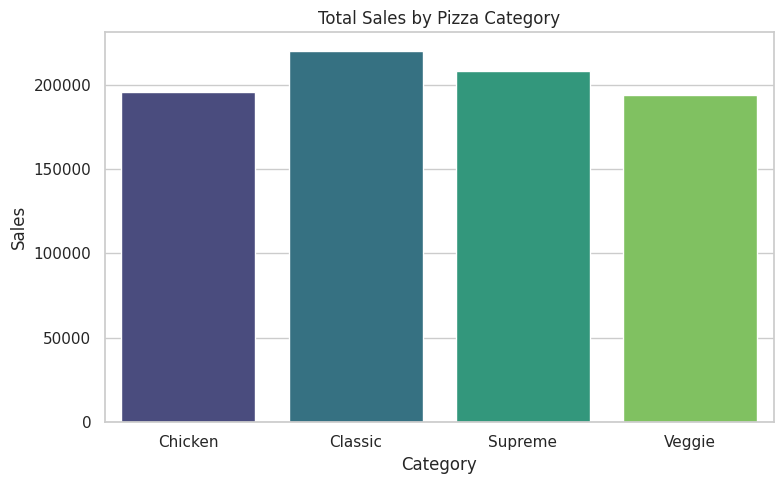

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(data=sales_by_category, x='pizza_category', y='total_price', palette='viridis')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

/tmp/ipython-input-43-3997873643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='quantity', y='pizza_name', palette='magma')


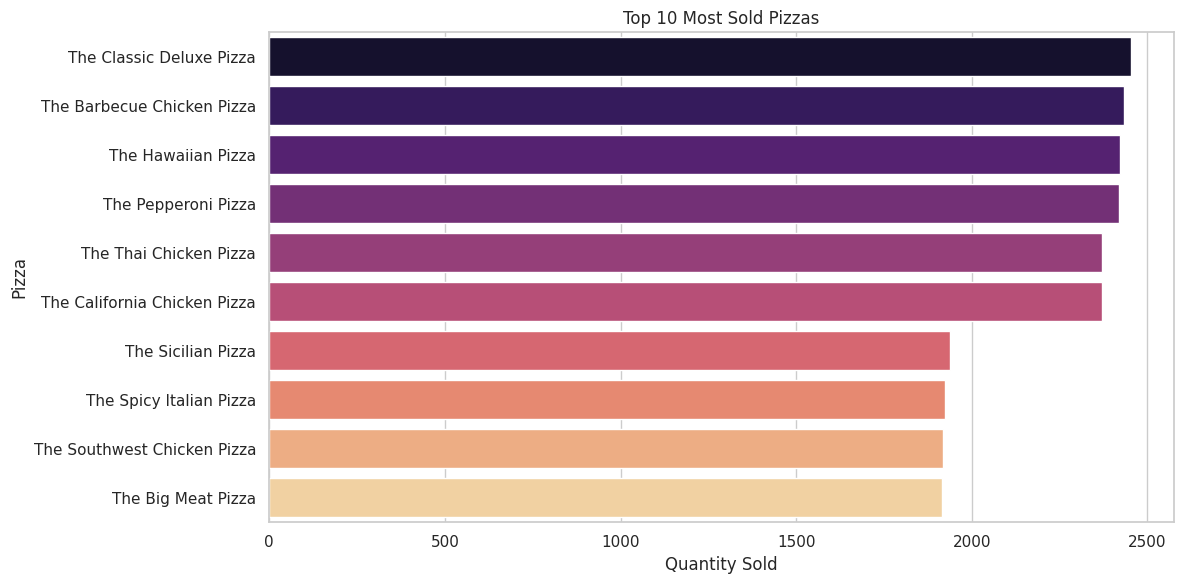

In [43]:
top10 = most_sold_pizzas.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='quantity', y='pizza_name', palette='magma')
plt.title('Top 10 Most Sold Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza')
plt.tight_layout()
plt.show()